In [1]:
# Read in data and packages
import pandas as pd
import numpy as np
#import bamboolib as bam

df = pd.read_csv('ML1_data_adj_v3.csv')

In [2]:
df1 = df.drop(columns=['Date', 'ticker', 'Fwd_Return_3M', 'Fwd_Return_3M_Class'])
df1.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,89713.000000,8.971300e+04,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,...,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000
mean,0.246713,3.931676e+04,0.229546,0.247659,0.229168,0.176547,0.193511,0.272333,2.036768,2.246334,...,4.694719,50.402044,-6.312812,26.455197,14.557601,0.659862,5.857186,18.668430,0.173378,2.496072
std,1.254363,1.225829e+05,2.804868,1.647323,1.430034,0.662016,0.691431,2.513606,110.520523,83.043696,...,13.743282,803.432790,541.031897,321.294317,24.035069,28.525183,19.706253,13.238269,6.493583,3.428154
min,-1.989822,2.285343e+02,-11.002105,-3.799283,-1.957421,-0.984936,-0.327309,-0.197458,-9683.752502,-7607.204848,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,-0.006349,3.727805e+03,0.000000,-0.016803,-0.011628,0.016529,0.052462,0.058405,0.000000,0.000000,...,1.457793,10.014360,-2.583632,2.098891,5.382305,-2.044049,1.707999,8.825271,-1.038489,0.884382
50%,0.116129,9.801431e+03,0.000000,0.072165,0.110577,0.119105,0.129630,0.133596,0.280785,0.490196,...,2.503581,14.564127,0.372151,4.086355,11.332716,0.628516,2.852672,15.641937,0.151272,1.641748
75%,0.343650,2.710075e+04,0.084309,0.346821,0.321429,0.253472,0.229798,0.241805,1.908397,1.795013,...,4.546948,25.585943,4.138887,8.842794,21.607765,3.665861,4.761934,25.705462,1.540079,3.081126
max,59.176471,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,11490.192310,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,599.369312,315.515590,127.801140,242.811441,59.533429


In [3]:
df2 = df1.sample(frac=0.9, random_state=123)
df2_unseen = df1.drop(df2.index)

In [4]:
df2_unseen.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,8971.000000,8.971000e+03,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,...,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,0.262609,3.697587e+04,0.230400,0.223994,0.250469,0.167927,0.184434,0.282240,4.319259,3.272641,...,4.899617,39.275519,-9.047208,25.716502,14.851550,1.028615,5.908122,18.737121,0.193981,2.525488
std,1.413916,1.074226e+05,1.885171,1.063273,2.937455,0.496868,0.679803,2.275377,197.307416,124.423281,...,15.582032,604.994705,572.616400,316.330526,27.510738,26.881052,20.745177,13.205663,5.629914,3.538804
min,-1.980676,2.406810e+02,-10.351019,-3.667633,-1.957421,-0.984689,-0.326522,-0.196610,-4194.983642,-1905.841924,...,0.105052,-521.481482,-30933.255810,0.140350,-287.128563,-682.186460,0.184316,-115.010300,-180.859303,0.040365
25%,-0.005731,3.741138e+03,0.000000,-0.015294,-0.011217,0.015540,0.050981,0.057504,0.000000,0.000000,...,1.434456,9.952124,-2.514729,2.080581,5.270407,-1.984759,1.725296,8.738079,-1.053896,0.877355
50%,0.115942,9.743425e+03,0.000000,0.071429,0.111270,0.116129,0.127154,0.131130,0.272483,0.482902,...,2.489649,14.564127,0.372151,4.033598,11.320845,0.662026,2.848391,15.778974,0.146763,1.636289
75%,0.349557,2.670198e+04,0.088289,0.332551,0.319690,0.251015,0.222634,0.238068,1.888156,1.816058,...,4.605024,25.175605,4.138887,8.918923,21.728591,3.810202,4.741275,25.897779,1.527929,3.127318
max,59.176471,2.193582e+06,66.469565,27.111111,258.000000,17.500000,43.000000,87.304375,12806.232240,10086.185160,...,267.251309,31560.000000,6488.274430,12572.504440,707.285829,549.804497,312.063838,127.801140,242.811441,56.215377


In [5]:
from pycaret.regression import *

In [6]:
reg_experiment = setup(df2, target = 'Fwd_Best_EPS_6M', session_id=123, log_experiment=True, experiment_name='Fwd_EPS_6M')

,Description,Value
0,session_id,123
1,Target,Fwd_Best_EPS_6M
2,Original Data,"(80742, 70)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(56519, 110)"


In [7]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0946,0.0848,0.2858,0.9453,0.1007,55.5789,74.2150
et,Extra Trees Regressor,0.0715,0.0930,0.2872,0.9428,0.0860,42.6529,27.4690
catboost,CatBoost Regressor,0.1625,0.1263,0.3504,0.9194,0.1393,191.1318,11.2590
xgboost,Extreme Gradient Boosting,0.1618,0.1330,0.3502,0.9130,0.1400,170.2824,12.1280
dt,Decision Tree Regressor,0.1042,0.1771,0.4092,0.8838,0.1393,26.9199,1.3970
lightgbm,Light Gradient Boosting Machine,0.2162,0.1877,0.4291,0.8808,0.1828,228.6066,0.8400
gbr,Gradient Boosting Regressor,0.2668,0.2344,0.4825,0.8489,0.2196,235.9111,19.1470
ridge,Ridge Regression,0.3666,1.0851,1.0340,0.3233,0.2594,56.2264,0.0550
br,Bayesian Ridge,0.3661,1.1092,1.0436,0.3098,0.2592,54.4770,0.9450
omp,Orthogonal Matching Pursuit,0.3683,1.1660,1.0692,0.2785,0.2646,95.2497,0.0570


In [8]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0962,0.1489,0.3859,0.9058,0.0969,6.5171
1,0.0919,0.0565,0.2377,0.9708,0.0966,85.0895
2,0.0961,0.0896,0.2994,0.9416,0.1051,1.0734
3,0.0920,0.0435,0.2085,0.9681,0.1012,0.8494
4,0.0992,0.1093,0.3306,0.9147,0.1055,27.4641
5,0.0966,0.1000,0.3162,0.9482,0.0975,374.9233
6,0.0942,0.0494,0.2222,0.9743,0.1008,18.3114
7,0.0947,0.0986,0.3140,0.9402,0.1026,8.6633
8,0.0927,0.0492,0.2219,0.9647,0.1006,32.0069
9,0.0931,0.1034,0.3216,0.9243,0.1005,0.8908


In [9]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

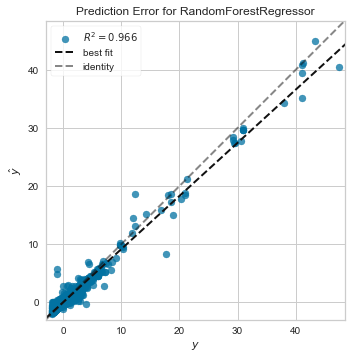

In [10]:
plot_model(rf, plot = 'error')

In [11]:
final_rf = finalize_model(rf)

In [12]:
unseen_predictions = predict_model(final_rf, data=df2_unseen)
unseen_predictions.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label
count,8971.000000,8.971000e+03,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,...,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,0.262609,3.697587e+04,0.230400,0.223994,0.250469,0.167927,0.184434,0.282240,4.319259,3.272641,...,39.275519,-9.047208,25.716502,14.851550,1.028615,5.908122,18.737121,0.193981,2.525488,0.254512
std,1.413916,1.074226e+05,1.885171,1.063273,2.937455,0.496868,0.679803,2.275377,197.307416,124.423281,...,604.994705,572.616400,316.330526,27.510738,26.881052,20.745177,13.205663,5.629914,3.538804,1.275057
min,-1.980676,2.406810e+02,-10.351019,-3.667633,-1.957421,-0.984689,-0.326522,-0.196610,-4194.983642,-1905.841924,...,-521.481482,-30933.255810,0.140350,-287.128563,-682.186460,0.184316,-115.010300,-180.859303,0.040365,-1.979903
25%,-0.005731,3.741138e+03,0.000000,-0.015294,-0.011217,0.015540,0.050981,0.057504,0.000000,0.000000,...,9.952124,-2.514729,2.080581,5.270407,-1.984759,1.725296,8.738079,-1.053896,0.877355,0.007354
50%,0.115942,9.743425e+03,0.000000,0.071429,0.111270,0.116129,0.127154,0.131130,0.272483,0.482902,...,14.564127,0.372151,4.033598,11.320845,0.662026,2.848391,15.778974,0.146763,1.636289,0.123554
75%,0.349557,2.670198e+04,0.088289,0.332551,0.319690,0.251015,0.222634,0.238068,1.888156,1.816058,...,25.175605,4.138887,8.918923,21.728591,3.810202,4.741275,25.897779,1.527929,3.127318,0.324595
max,59.176471,2.193582e+06,66.469565,27.111111,258.000000,17.500000,43.000000,87.304375,12806.232240,10086.185160,...,31560.000000,6488.274430,12572.504440,707.285829,549.804497,312.063838,127.801140,242.811441,56.215377,44.979825


In [13]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Fwd_Best_EPS_6M, unseen_predictions.Label, 'R2')

0.9652

# FWD RETURN 3M MODEL

In [14]:
from pycaret.regression import *

In [16]:
df3 = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M_Class'])
df3.describe()

,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,89713.000000,8.971300e+04,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,...,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000
mean,1.902532,3.931676e+04,0.229546,0.247659,0.229168,0.176547,0.193511,0.272333,2.036768,2.246334,...,4.694719,50.402044,-6.312812,26.455197,14.557601,0.659862,5.857186,18.668430,0.173378,2.496072
std,13.559946,1.225829e+05,2.804868,1.647323,1.430034,0.662016,0.691431,2.513606,110.520523,83.043696,...,13.743282,803.432790,541.031897,321.294317,24.035069,28.525183,19.706253,13.238269,6.493583,3.428154
min,-70.666545,2.285343e+02,-11.002105,-3.799283,-1.957421,-0.984936,-0.327309,-0.197458,-9683.752502,-7607.204848,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,-6.456327,3.727805e+03,0.000000,-0.016803,-0.011628,0.016529,0.052462,0.058405,0.000000,0.000000,...,1.457793,10.014360,-2.583632,2.098891,5.382305,-2.044049,1.707999,8.825271,-1.038489,0.884382
50%,1.207900,9.801431e+03,0.000000,0.072165,0.110577,0.119105,0.129630,0.133596,0.280785,0.490196,...,2.503581,14.564127,0.372151,4.086355,11.332716,0.628516,2.852672,15.641937,0.151272,1.641748
75%,8.981228,2.710075e+04,0.084309,0.346821,0.321429,0.253472,0.229798,0.241805,1.908397,1.795013,...,4.546948,25.585943,4.138887,8.842794,21.607765,3.665861,4.761934,25.705462,1.540079,3.081126
max,247.456219,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,11490.192310,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,599.369312,315.515590,127.801140,242.811441,59.533429


In [17]:
df4 = df3.sample(frac=0.9, random_state=123)
df4_unseen = df3.drop(df4.index)

In [18]:
df4_unseen.describe()

,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,8971.000000,8.971000e+03,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,...,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,2.106956,3.697587e+04,0.230400,0.223994,0.250469,0.167927,0.184434,0.282240,4.319259,3.272641,...,4.899617,39.275519,-9.047208,25.716502,14.851550,1.028615,5.908122,18.737121,0.193981,2.525488
std,13.980981,1.074226e+05,1.885171,1.063273,2.937455,0.496868,0.679803,2.275377,197.307416,124.423281,...,15.582032,604.994705,572.616400,316.330526,27.510738,26.881052,20.745177,13.205663,5.629914,3.538804
min,-52.761829,2.406810e+02,-10.351019,-3.667633,-1.957421,-0.984689,-0.326522,-0.196610,-4194.983642,-1905.841924,...,0.105052,-521.481482,-30933.255810,0.140350,-287.128563,-682.186460,0.184316,-115.010300,-180.859303,0.040365
25%,-6.210926,3.741138e+03,0.000000,-0.015294,-0.011217,0.015540,0.050981,0.057504,0.000000,0.000000,...,1.434456,9.952124,-2.514729,2.080581,5.270407,-1.984759,1.725296,8.738079,-1.053896,0.877355
50%,1.442803,9.743425e+03,0.000000,0.071429,0.111270,0.116129,0.127154,0.131130,0.272483,0.482902,...,2.489649,14.564127,0.372151,4.033598,11.320845,0.662026,2.848391,15.778974,0.146763,1.636289
75%,9.272362,2.670198e+04,0.088289,0.332551,0.319690,0.251015,0.222634,0.238068,1.888156,1.816058,...,4.605024,25.175605,4.138887,8.918923,21.728591,3.810202,4.741275,25.897779,1.527929,3.127318
max,247.456219,2.193582e+06,66.469565,27.111111,258.000000,17.500000,43.000000,87.304375,12806.232240,10086.185160,...,267.251309,31560.000000,6488.274430,12572.504440,707.285829,549.804497,312.063838,127.801140,242.811441,56.215377


In [19]:
reg_experiment = setup(df4, target = 'Fwd_Return_3M', session_id=123, log_experiment=True, experiment_name='Fwd_Return_3M')

,Description,Value
0,session_id,123
1,Target,Fwd_Return_3M
2,Original Data,"(80742, 70)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(56519, 110)"


In [20]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.9562,36.5103,6.0380,0.8019,0.6410,2.3082,28.0020
rf,Random Forest Regressor,4.3201,39.8706,6.3109,0.7837,0.6671,2.3385,76.3300
catboost,CatBoost Regressor,6.8517,82.6012,9.0876,0.5517,0.9991,2.6690,14.4580
xgboost,Extreme Gradient Boosting,6.8381,82.9087,9.1038,0.5500,0.9929,3.6845,13.9540
dt,Decision Tree Regressor,5.9491,88.4683,9.4017,0.5196,0.7725,6.3778,1.2380
lightgbm,Light Gradient Boosting Machine,8.3753,121.4491,11.0196,0.3408,1.2859,2.2030,1.0450
gbr,Gradient Boosting Regressor,9.4760,158.4788,12.5876,0.1399,1.4528,2.1483,19.2070
knn,K Neighbors Regressor,9.7033,173.6074,13.1750,0.0577,1.1392,4.9808,0.8750
ridge,Ridge Regression,9.8495,177.5404,13.3231,0.0365,1.4017,2.6436,0.0530
br,Bayesian Ridge,9.8492,177.5409,13.3231,0.0365,1.4041,2.6429,1.0370


In [21]:
et2 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.0145,39.7388,6.3039,0.7861,0.6473,2.7164
1,3.8929,34.4989,5.8736,0.8075,0.6326,2.9948
2,3.9724,33.9179,5.8239,0.8167,0.6403,1.7430
3,3.9435,35.5629,5.9635,0.8020,0.6445,4.3000
4,3.8859,34.0168,5.8324,0.8069,0.6391,1.7687
5,3.9622,35.1904,5.9322,0.8124,0.6393,1.3972
6,3.9229,34.7180,5.8922,0.8170,0.6335,2.7683
7,3.9671,35.4369,5.9529,0.8087,0.6371,1.5151
8,3.9220,39.5772,6.2910,0.7824,0.6421,2.2121
9,4.0791,42.4450,6.5150,0.7794,0.6539,1.6660


In [22]:
evaluate_model(et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

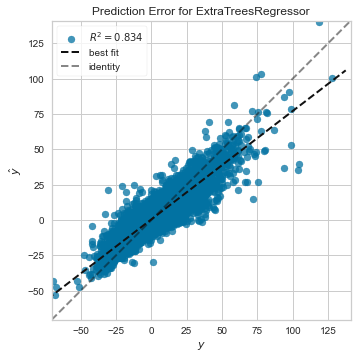

In [23]:
plot_model(et2, plot = 'error')

In [24]:
final_et2 = finalize_model(et2)

In [25]:
unseen_predictions2 = predict_model(final_et2, data=df4_unseen)
unseen_predictions2.head()

,Fwd_Return_3M,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label
0,4.913092,99981.6900,Financials,-2.285714,-3.666667,-1.957421,-0.982218,-0.326522,-0.195926,0.0,...,10.200046,-0.910293,0.726710,27.033367,-6.017447,9.965697,5.105392,-24.770061,8.041407,-1.229208
4,-5.058633,88086.8000,Consumer Discretionary,0.000000,-0.063291,-1.836316,-0.984689,-0.326358,-0.194601,0.0,...,1.089969,-65.019557,17.207623,-2.957622,-32.806288,7.420165,8.137139,-27.386556,5.606271,-5.770443
17,6.247371,1357.8912,Industrials,0.000000,16.000000,-1.611650,-0.904762,-0.325581,-0.196610,0.0,...,3.810998,-1.814705,7.444528,-0.720347,-2.990404,7.055844,1.091888,-5.459850,3.910771,-5.022730
37,33.273470,1775.0121,Industrials,-1.285714,-3.667633,-1.910272,-0.961656,-0.316327,-0.187790,0.0,...,8.432530,0.164387,2.810946,11.741971,3.183495,3.583558,9.552110,-3.445995,2.333974,34.392352
47,33.010090,1713.5588,Industrials,0.000000,-3.629674,-1.899504,-0.957055,-0.314286,-0.186325,0.0,...,8.432530,0.164387,2.822907,11.741971,3.183495,3.557690,9.552110,-3.445995,2.336690,32.948022


In [26]:
from pycaret.utils import check_metric
check_metric(unseen_predictions2.Fwd_Return_3M, unseen_predictions2.Label, 'R2')

0.8775

# FWD_RETURN_3M_CLASS MODEL

In [27]:
df5 = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M'])
df5.describe()

,Fwd_Return_3M_Class,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,89713.000000,8.971300e+04,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,...,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000
mean,0.543087,3.931676e+04,0.229546,0.247659,0.229168,0.176547,0.193511,0.272333,2.036768,2.246334,...,4.694719,50.402044,-6.312812,26.455197,14.557601,0.659862,5.857186,18.668430,0.173378,2.496072
std,0.498143,1.225829e+05,2.804868,1.647323,1.430034,0.662016,0.691431,2.513606,110.520523,83.043696,...,13.743282,803.432790,541.031897,321.294317,24.035069,28.525183,19.706253,13.238269,6.493583,3.428154
min,0.000000,2.285343e+02,-11.002105,-3.799283,-1.957421,-0.984936,-0.327309,-0.197458,-9683.752502,-7607.204848,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,0.000000,3.727805e+03,0.000000,-0.016803,-0.011628,0.016529,0.052462,0.058405,0.000000,0.000000,...,1.457793,10.014360,-2.583632,2.098891,5.382305,-2.044049,1.707999,8.825271,-1.038489,0.884382
50%,1.000000,9.801431e+03,0.000000,0.072165,0.110577,0.119105,0.129630,0.133596,0.280785,0.490196,...,2.503581,14.564127,0.372151,4.086355,11.332716,0.628516,2.852672,15.641937,0.151272,1.641748
75%,1.000000,2.710075e+04,0.084309,0.346821,0.321429,0.253472,0.229798,0.241805,1.908397,1.795013,...,4.546948,25.585943,4.138887,8.842794,21.607765,3.665861,4.761934,25.705462,1.540079,3.081126
max,1.000000,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,11490.192310,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,599.369312,315.515590,127.801140,242.811441,59.533429


In [28]:
df6 = df5.sample(frac=0.9, random_state=123)
df6_unseen = df5.drop(df6.index)

In [29]:
df6_unseen.describe()

,Fwd_Return_3M_Class,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,8971.000000,8.971000e+03,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,...,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,0.548880,3.697587e+04,0.230400,0.223994,0.250469,0.167927,0.184434,0.282240,4.319259,3.272641,...,4.899617,39.275519,-9.047208,25.716502,14.851550,1.028615,5.908122,18.737121,0.193981,2.525488
std,0.497633,1.074226e+05,1.885171,1.063273,2.937455,0.496868,0.679803,2.275377,197.307416,124.423281,...,15.582032,604.994705,572.616400,316.330526,27.510738,26.881052,20.745177,13.205663,5.629914,3.538804
min,0.000000,2.406810e+02,-10.351019,-3.667633,-1.957421,-0.984689,-0.326522,-0.196610,-4194.983642,-1905.841924,...,0.105052,-521.481482,-30933.255810,0.140350,-287.128563,-682.186460,0.184316,-115.010300,-180.859303,0.040365
25%,0.000000,3.741138e+03,0.000000,-0.015294,-0.011217,0.015540,0.050981,0.057504,0.000000,0.000000,...,1.434456,9.952124,-2.514729,2.080581,5.270407,-1.984759,1.725296,8.738079,-1.053896,0.877355
50%,1.000000,9.743425e+03,0.000000,0.071429,0.111270,0.116129,0.127154,0.131130,0.272483,0.482902,...,2.489649,14.564127,0.372151,4.033598,11.320845,0.662026,2.848391,15.778974,0.146763,1.636289
75%,1.000000,2.670198e+04,0.088289,0.332551,0.319690,0.251015,0.222634,0.238068,1.888156,1.816058,...,4.605024,25.175605,4.138887,8.918923,21.728591,3.810202,4.741275,25.897779,1.527929,3.127318
max,1.000000,2.193582e+06,66.469565,27.111111,258.000000,17.500000,43.000000,87.304375,12806.232240,10086.185160,...,267.251309,31560.000000,6488.274430,12572.504440,707.285829,549.804497,312.063838,127.801140,242.811441,56.215377


In [30]:
from pycaret.classification import *

In [31]:
reg_experiment = setup(df6, target = 'Fwd_Return_3M_Class', session_id=123, log_experiment=True, experiment_name='Fwd_Return_3M_Class')

,Description,Value
0,session_id,123
1,Target,Fwd_Return_3M_Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(80742, 70)"
5,Missing Values,False
6,Numeric Features,61
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8732,0.9350,0.8902,0.8773,0.8837,0.7443,0.7444,7.8900
et,Extra Trees Classifier,0.8668,0.9264,0.8830,0.8725,0.8777,0.7315,0.7316,5.2100
dt,Decision Tree Classifier,0.8077,0.8066,0.8202,0.8238,0.8219,0.6129,0.6129,1.5810
catboost,CatBoost Classifier,0.8045,0.8811,0.8621,0.7943,0.8268,0.6033,0.6060,17.7070
xgboost,Extreme Gradient Boosting,0.7993,0.8751,0.8466,0.7956,0.8203,0.5934,0.5949,15.2840
lightgbm,Light Gradient Boosting Machine,0.7406,0.8208,0.8484,0.7214,0.7797,0.4692,0.4784,1.1960
gbc,Gradient Boosting Classifier,0.6250,0.6798,0.8410,0.6117,0.7083,0.2185,0.2411,27.3180
knn,K Neighbors Classifier,0.5981,0.6275,0.6568,0.6219,0.6389,0.1867,0.1870,1.8190
ada,Ada Boost Classifier,0.5762,0.5988,0.7395,0.5859,0.6538,0.1260,0.1318,5.4220
ridge,Ridge Classifier,0.5659,0.0000,0.7610,0.5747,0.6549,0.0996,0.1070,0.1110


In [33]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8698,0.9315,0.8895,0.8724,0.8809,0.7373,0.7375
1,0.8659,0.9327,0.8836,0.8705,0.8770,0.7296,0.7297
2,0.8751,0.9349,0.8879,0.8821,0.8850,0.7483,0.7483
3,0.8700,0.9357,0.8911,0.8715,0.8812,0.7376,0.7378
4,0.8795,0.9398,0.8980,0.8816,0.8897,0.7570,0.7571
5,0.8781,0.9389,0.8905,0.8850,0.8877,0.7544,0.7544
6,0.8726,0.9319,0.8960,0.8721,0.8839,0.7428,0.7432
7,0.8698,0.9331,0.8833,0.8770,0.8801,0.7376,0.7376
8,0.8834,0.9432,0.9013,0.8854,0.8932,0.7648,0.7650
9,0.8678,0.9279,0.8806,0.8758,0.8782,0.7337,0.7337


In [34]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

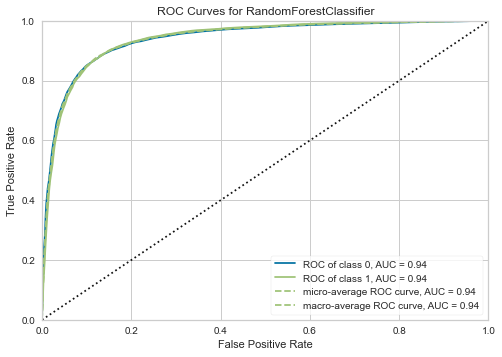

In [35]:
plot_model(rf)

In [36]:
final_rf = finalize_model(rf)

In [37]:
unseen_predictions3 = predict_model(final_rf, data=df6_unseen)
unseen_predictions3.head()

,Fwd_Return_3M_Class,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label,Score
0,1,99981.6900,Financials,-2.285714,-3.666667,-1.957421,-0.982218,-0.326522,-0.195926,0.0,...,-0.910293,0.726710,27.033367,-6.017447,9.965697,5.105392,-24.770061,8.041407,1,0.64
4,0,88086.8000,Consumer Discretionary,0.000000,-0.063291,-1.836316,-0.984689,-0.326358,-0.194601,0.0,...,-65.019557,17.207623,-2.957622,-32.806288,7.420165,8.137139,-27.386556,5.606271,0,0.87
17,1,1357.8912,Industrials,0.000000,16.000000,-1.611650,-0.904762,-0.325581,-0.196610,0.0,...,-1.814705,7.444528,-0.720347,-2.990404,7.055844,1.091888,-5.459850,3.910771,0,0.88
37,1,1775.0121,Industrials,-1.285714,-3.667633,-1.910272,-0.961656,-0.316327,-0.187790,0.0,...,0.164387,2.810946,11.741971,3.183495,3.583558,9.552110,-3.445995,2.333974,1,0.92
47,1,1713.5588,Industrials,0.000000,-3.629674,-1.899504,-0.957055,-0.314286,-0.186325,0.0,...,0.164387,2.822907,11.741971,3.183495,3.557690,9.552110,-3.445995,2.336690,1,0.95


In [38]:
from pycaret.utils import check_metric
check_metric(unseen_predictions3.Fwd_Return_3M_Class, unseen_predictions3.Label, 'Accuracy')

0.8893

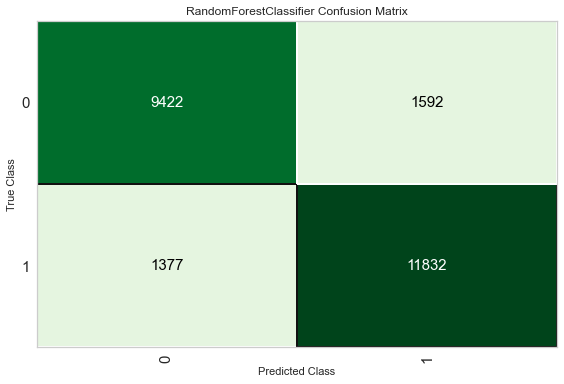

In [39]:
# plot model (without plot kwargs)
plot_model(rf, plot = 'confusion_matrix') 


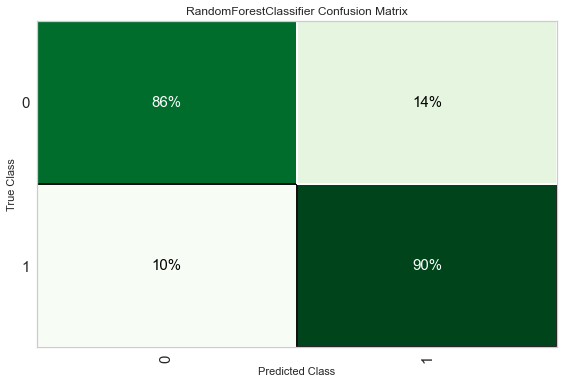

In [40]:
# plot model (with plot kwargs)
plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})